In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from matplotlib.dates import DateFormatter


In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Replace 'your_file.xlsx' with the path to your file
df = pd.read_excel('Fury_Friends data set_4376.xlsx', engine='openpyxl')

In [4]:
df

,Managers First Name,Managers Surname,Area,Pet,Units Sld,Revenue,Cost,Profit,Date
0,Adam,Jones,Dudley,Cat,1118.0,5590.0,2459.6,3130.4,2020-11-01
1,Adam,Jones,Dudley,Cat,708.0,3540.0,1557.6,1982.4,2020-06-01
2,Adam,Jones,Dudley,Cat,1269.0,6345.0,2791.8,3553.2,2020-10-01
3,Adam,Jones,Dudley,Cat,1631.0,8155.0,3588.2,4566.8,2020-07-01
4,Adam,Jones,Dudley,Cat,2240.0,11200.0,4928.0,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
996,Raj,Patel,Margate,Bird,NaN,9576.0,4389.0,NaN,2020-09-01
997,Raj,Patel,Margate,Bird,986.0,5916.0,2711.5,3204.5,2020-10-01
998,Raj,Patel,Margate,Bird,606.0,3636.0,1666.5,1969.5,2020-04-01
999,Raj,Patel,Margate,Bird,2460.0,14760.0,6765.0,7995.0,2020-07-01


### Data Cleaninig 

In [10]:
df.tail()

,Managers First Name,Managers Surname,Area,Pet,Units Sld,Revenue,Cost,Profit,Date
996,Raj,Patel,Margate,Bird,NaN,9576.0,4389.0,NaN,2020-09-01
997,Raj,Patel,Margate,Bird,986.0,5916.0,2711.5,3204.5,2020-10-01
998,Raj,Patel,Margate,Bird,606.0,3636.0,1666.5,1969.5,2020-04-01
999,Raj,Patel,Margate,Bird,2460.0,14760.0,6765.0,7995.0,2020-07-01
1000,Raj,Patel,Margate,Bird,914.0,NaN,2513.5,2970.5,2020-12-01


In [12]:
df.head()

,Managers First Name,Managers Surname,Area,Pet,Units Sld,Revenue,Cost,Profit,Date
0,Adam,Jones,Dudley,Cat,1118.0,5590.0,2459.6,3130.4,2020-11-01
1,Adam,Jones,Dudley,Cat,708.0,3540.0,1557.6,1982.4,2020-06-01
2,Adam,Jones,Dudley,Cat,1269.0,6345.0,2791.8,3553.2,2020-10-01
3,Adam,Jones,Dudley,Cat,1631.0,8155.0,3588.2,4566.8,2020-07-01
4,Adam,Jones,Dudley,Cat,2240.0,11200.0,4928.0,NaN,2020-02-01


In [14]:
df.describe()

,Units Sld,Revenue,Cost,Profit,Date
count,991.000000,988.000000,994.000000,995.000000,1001
mean,1632.216953,6831.564777,2818.697384,4024.763668,2020-07-03 12:25:10.489510400
min,200.000000,200.000000,40.000000,160.000000,2020-01-01 00:00:00
25%,923.000000,2958.000000,1206.600000,1872.000000,2020-04-01 00:00:00
50%,1520.000000,5950.000000,2454.000000,3460.800000,2020-07-01 00:00:00
75%,2300.500000,9512.500000,3996.875000,5452.500000,2020-10-01 00:00:00
max,4493.000000,23988.000000,10994.500000,13479.000000,2020-12-01 00:00:00
std,878.784996,4708.349878,2073.292138,2659.671923,NaN


In [16]:
df.columns

Index(['Managers First Name', 'Managers Surname', 'Area', 'Pet', 'Units Sld',
       'Revenue', 'Cost', 'Profit', 'Date'],
      dtype='object')

In [18]:
df.dtypes

Managers First Name            object
Managers Surname               object
Area                           object
Pet                            object
Units Sld                     float64
Revenue                       float64
Cost                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

In [20]:
df.info

<bound method DataFrame.info of      Managers First Name Managers Surname     Area   Pet  Units Sld  Revenue  \
0                   Adam            Jones   Dudley   Cat     1118.0   5590.0   
1                   Adam            Jones   Dudley   Cat      708.0   3540.0   
2                   Adam            Jones   Dudley   Cat     1269.0   6345.0   
3                   Adam            Jones   Dudley   Cat     1631.0   8155.0   
4                   Adam            Jones   Dudley   Cat     2240.0  11200.0   
...                  ...              ...      ...   ...        ...      ...   
996                  Raj            Patel  Margate  Bird        NaN   9576.0   
997                  Raj            Patel  Margate  Bird      986.0   5916.0   
998                  Raj            Patel  Margate  Bird      606.0   3636.0   
999                  Raj            Patel  Margate  Bird     2460.0  14760.0   
1000                 Raj            Patel  Margate  Bird      914.0      NaN   

       

In [22]:
df.isnull().sum()

Managers First Name    15
Managers Surname       16
Area                    0
Pet                     0
Units Sld              10
Revenue                13
Cost                    7
Profit                  6
Date                    0
dtype: int64

In [24]:
df.shape

(1001, 9)

In [26]:
df.duplicated().sum()

354

In [28]:
df = df.drop_duplicates()

In [30]:
df.shape

(647, 9)

In [32]:
df.duplicated().sum()

0

In [34]:
df = df.rename(columns={'Managers First Name': 'ManagersFirstName'})

In [36]:
df

,ManagersFirstName,Managers Surname,Area,Pet,Units Sld,Revenue,Cost,Profit,Date
0,Adam,Jones,Dudley,Cat,1118.0,5590.0,2459.60,3130.40,2020-11-01
1,Adam,Jones,Dudley,Cat,708.0,3540.0,1557.60,1982.40,2020-06-01
2,Adam,Jones,Dudley,Cat,1269.0,6345.0,2791.80,3553.20,2020-10-01
3,Adam,Jones,Dudley,Cat,1631.0,8155.0,3588.20,4566.80,2020-07-01
4,Adam,Jones,Dudley,Cat,2240.0,11200.0,4928.00,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
980,Raj,Patel,Margate,Fish,2567.0,NaN,3208.75,4492.25,2020-06-01
983,NaN,NaN,Margate,Fish,1806.0,5418.0,2257.50,3160.50,2020-05-01
995,NaN,NaN,Margate,Bird,790.0,4740.0,2172.50,2567.50,2020-05-01
996,Raj,Patel,Margate,Bird,NaN,9576.0,4389.00,NaN,2020-09-01


In [38]:
df = df.rename(columns={'Managers Surname' : 'ManagersSurname'})
df = df.rename(columns={'Units Sld': 'UnitsSld'})

In [40]:
df

,ManagersFirstName,ManagersSurname,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date
0,Adam,Jones,Dudley,Cat,1118.0,5590.0,2459.60,3130.40,2020-11-01
1,Adam,Jones,Dudley,Cat,708.0,3540.0,1557.60,1982.40,2020-06-01
2,Adam,Jones,Dudley,Cat,1269.0,6345.0,2791.80,3553.20,2020-10-01
3,Adam,Jones,Dudley,Cat,1631.0,8155.0,3588.20,4566.80,2020-07-01
4,Adam,Jones,Dudley,Cat,2240.0,11200.0,4928.00,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
980,Raj,Patel,Margate,Fish,2567.0,NaN,3208.75,4492.25,2020-06-01
983,NaN,NaN,Margate,Fish,1806.0,5418.0,2257.50,3160.50,2020-05-01
995,NaN,NaN,Margate,Bird,790.0,4740.0,2172.50,2567.50,2020-05-01
996,Raj,Patel,Margate,Bird,NaN,9576.0,4389.00,NaN,2020-09-01


In [42]:
df.isnull().sum()

ManagersFirstName    15
ManagersSurname      16
Area                  0
Pet                   0
UnitsSld             10
Revenue              13
Cost                  7
Profit                6
Date                  0
dtype: int64

<Axes: >

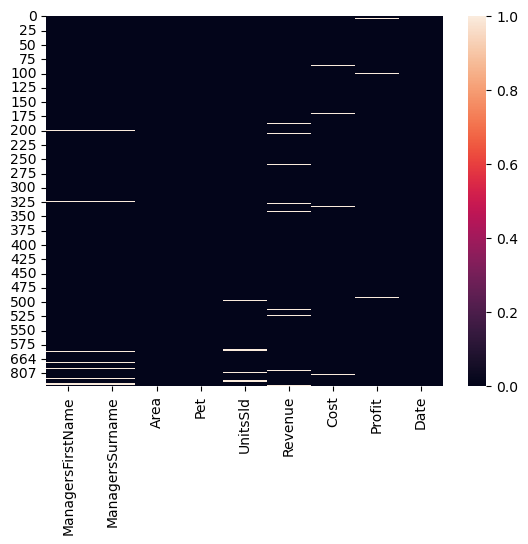

In [44]:
sns.heatmap(df.isnull())

In [46]:
df.shape

(647, 9)

In [48]:
df.shape[0]

647

In [50]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

1.1506096513824489

In [52]:
df['ManagersFirstName'].value_counts()

ManagersFirstName
Adam       159
Amanda     128
Nigella    118
Raj        114
Bogdan     113
Name: count, dtype: int64

In [54]:
# df['Pet'].value_counts()
# PetEncoder = LabelEncoder()
# df['Pet'] = PetEncoder.fit_transform(df['Pet'])
# df['Pet'].value_counts()
# # df['Area'].value_counts()

In [56]:
# df['Area'] . value_counts()
# AreaEncoder = LabelEncoder()

# df['Area'] = AreaEncoder.fit_transform(df['Area'])
# df['Area'].value_counts()
# df.dtypes

In [58]:
df

,ManagersFirstName,ManagersSurname,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date
0,Adam,Jones,Dudley,Cat,1118.0,5590.0,2459.60,3130.40,2020-11-01
1,Adam,Jones,Dudley,Cat,708.0,3540.0,1557.60,1982.40,2020-06-01
2,Adam,Jones,Dudley,Cat,1269.0,6345.0,2791.80,3553.20,2020-10-01
3,Adam,Jones,Dudley,Cat,1631.0,8155.0,3588.20,4566.80,2020-07-01
4,Adam,Jones,Dudley,Cat,2240.0,11200.0,4928.00,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
980,Raj,Patel,Margate,Fish,2567.0,NaN,3208.75,4492.25,2020-06-01
983,NaN,NaN,Margate,Fish,1806.0,5418.0,2257.50,3160.50,2020-05-01
995,NaN,NaN,Margate,Bird,790.0,4740.0,2172.50,2567.50,2020-05-01
996,Raj,Patel,Margate,Bird,NaN,9576.0,4389.00,NaN,2020-09-01


In [60]:
df['Area']

0        Dudley
1        Dudley
2        Dudley
3        Dudley
4        Dudley
         ...   
980     Margate
983     Margate
995     Margate
996     Margate
1000    Margate
Name: Area, Length: 647, dtype: object

### Create Manager FullName

In [63]:
df['Manager'] = df['ManagersFirstName'] + ' ' + df['ManagersSurname']

In [65]:
df.drop(['ManagersFirstName','ManagersSurname'],axis=1,inplace=True )

In [67]:
df.dtypes

Area                object
Pet                 object
UnitsSld           float64
Revenue            float64
Cost               float64
Profit             float64
Date        datetime64[ns]
Manager             object
dtype: object

In [69]:
# df['Area'] = df['Area'].astype(int) 

In [71]:
df

,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date,Manager
0,Dudley,Cat,1118.0,5590.0,2459.60,3130.40,2020-11-01,Adam Jones
1,Dudley,Cat,708.0,3540.0,1557.60,1982.40,2020-06-01,Adam Jones
2,Dudley,Cat,1269.0,6345.0,2791.80,3553.20,2020-10-01,Adam Jones
3,Dudley,Cat,1631.0,8155.0,3588.20,4566.80,2020-07-01,Adam Jones
4,Dudley,Cat,2240.0,11200.0,4928.00,NaN,2020-02-01,Adam Jones
...,...,...,...,...,...,...,...,...
980,Margate,Fish,2567.0,NaN,3208.75,4492.25,2020-06-01,Raj Patel
983,Margate,Fish,1806.0,5418.0,2257.50,3160.50,2020-05-01,NaN
995,Margate,Bird,790.0,4740.0,2172.50,2567.50,2020-05-01,NaN
996,Margate,Bird,NaN,9576.0,4389.00,NaN,2020-09-01,Raj Patel


In [119]:
for i in df.select_dtypes(include=object).columns:
    df[i] .fillna(df[i].mod)

In [121]:
df

,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date,Manager,Month,Quarter,year
0,Dudley,Cat,1118.0,5590.00,2459.60,3130.40,2020-11-01,Adam Jones,11,4,2020
1,Dudley,Cat,708.0,3540.00,1557.60,1982.40,2020-06-01,Adam Jones,6,2,2020
2,Dudley,Cat,1269.0,6345.00,2791.80,3553.20,2020-10-01,Adam Jones,10,4,2020
3,Dudley,Cat,1631.0,8155.00,3588.20,4566.80,2020-07-01,Adam Jones,7,3,2020
4,Dudley,Cat,2240.0,11200.00,4928.00,3995.12,2020-02-01,Adam Jones,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
980,Margate,Fish,2567.0,6772.67,3208.75,4492.25,2020-06-01,Raj Patel,6,2,2020
983,Margate,Fish,1806.0,5418.00,2257.50,3160.50,2020-05-01,NaN,5,2,2020
995,Margate,Bird,790.0,4740.00,2172.50,2567.50,2020-05-01,NaN,5,2,2020
996,Margate,Bird,1634.4,9576.00,4389.00,3995.12,2020-09-01,Raj Patel,9,3,2020


In [125]:
# Fill missing first names with most common first name
most_common_first = df['Manager'].mode()[0]
df['Manager'] = df['Manager'].fillna(most_common_first)

In [127]:
df.isnull().sum()

Area        0
Pet         0
UnitsSld    0
Revenue     0
Cost        0
Profit      0
Date        0
Manager     0
Month       0
Quarter     0
year        0
dtype: int64

In [129]:
df

,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date,Manager,Month,Quarter,year
0,Dudley,Cat,1118.0,5590.00,2459.60,3130.40,2020-11-01,Adam Jones,11,4,2020
1,Dudley,Cat,708.0,3540.00,1557.60,1982.40,2020-06-01,Adam Jones,6,2,2020
2,Dudley,Cat,1269.0,6345.00,2791.80,3553.20,2020-10-01,Adam Jones,10,4,2020
3,Dudley,Cat,1631.0,8155.00,3588.20,4566.80,2020-07-01,Adam Jones,7,3,2020
4,Dudley,Cat,2240.0,11200.00,4928.00,3995.12,2020-02-01,Adam Jones,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
980,Margate,Fish,2567.0,6772.67,3208.75,4492.25,2020-06-01,Raj Patel,6,2,2020
983,Margate,Fish,1806.0,5418.00,2257.50,3160.50,2020-05-01,Adam Jones,5,2,2020
995,Margate,Bird,790.0,4740.00,2172.50,2567.50,2020-05-01,Adam Jones,5,2,2020
996,Margate,Bird,1634.4,9576.00,4389.00,3995.12,2020-09-01,Raj Patel,9,3,2020


In [131]:
df['UnitsSld'] = df['UnitsSld'].fillna(df['UnitsSld'].mean()).round(2)
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean()).round(2)
df['Cost'] = df['Cost'].fillna(df['Cost'].mean()).round(2)
df['Profit'] = df['Profit'].fillna(df['Profit'].mean()).round(2)

In [133]:
df

,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date,Manager,Month,Quarter,year
0,Dudley,Cat,1118.0,5590.00,2459.60,3130.40,2020-11-01,Adam Jones,11,4,2020
1,Dudley,Cat,708.0,3540.00,1557.60,1982.40,2020-06-01,Adam Jones,6,2,2020
2,Dudley,Cat,1269.0,6345.00,2791.80,3553.20,2020-10-01,Adam Jones,10,4,2020
3,Dudley,Cat,1631.0,8155.00,3588.20,4566.80,2020-07-01,Adam Jones,7,3,2020
4,Dudley,Cat,2240.0,11200.00,4928.00,3995.12,2020-02-01,Adam Jones,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
980,Margate,Fish,2567.0,6772.67,3208.75,4492.25,2020-06-01,Raj Patel,6,2,2020
983,Margate,Fish,1806.0,5418.00,2257.50,3160.50,2020-05-01,Adam Jones,5,2,2020
995,Margate,Bird,790.0,4740.00,2172.50,2567.50,2020-05-01,Adam Jones,5,2,2020
996,Margate,Bird,1634.4,9576.00,4389.00,3995.12,2020-09-01,Raj Patel,9,3,2020


In [135]:
df.isnull().sum()

Area        0
Pet         0
UnitsSld    0
Revenue     0
Cost        0
Profit      0
Date        0
Manager     0
Month       0
Quarter     0
year        0
dtype: int64

In [137]:
df['Date']

0      2020-11-01
1      2020-06-01
2      2020-10-01
3      2020-07-01
4      2020-02-01
          ...    
980    2020-06-01
983    2020-05-01
995    2020-05-01
996    2020-09-01
1000   2020-12-01
Name: Date, Length: 647, dtype: datetime64[ns]

In [139]:
df['Date'] = pd.to_datetime(df['Date'])

In [141]:
df['Month'] = df['Date'].dt.month

In [143]:
df['Quarter'] = df['Date'].dt.quarter

In [145]:
df['year'] = df['Date'].dt.year

In [147]:
df

,Area,Pet,UnitsSld,Revenue,Cost,Profit,Date,Manager,Month,Quarter,year
0,Dudley,Cat,1118.0,5590.00,2459.60,3130.40,2020-11-01,Adam Jones,11,4,2020
1,Dudley,Cat,708.0,3540.00,1557.60,1982.40,2020-06-01,Adam Jones,6,2,2020
2,Dudley,Cat,1269.0,6345.00,2791.80,3553.20,2020-10-01,Adam Jones,10,4,2020
3,Dudley,Cat,1631.0,8155.00,3588.20,4566.80,2020-07-01,Adam Jones,7,3,2020
4,Dudley,Cat,2240.0,11200.00,4928.00,3995.12,2020-02-01,Adam Jones,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
980,Margate,Fish,2567.0,6772.67,3208.75,4492.25,2020-06-01,Raj Patel,6,2,2020
983,Margate,Fish,1806.0,5418.00,2257.50,3160.50,2020-05-01,Adam Jones,5,2,2020
995,Margate,Bird,790.0,4740.00,2172.50,2567.50,2020-05-01,Adam Jones,5,2,2020
996,Margate,Bird,1634.4,9576.00,4389.00,3995.12,2020-09-01,Raj Patel,9,3,2020


In [149]:
# Visualization Functions

In [151]:
df['Pet'].value_counts()

Pet
Hampster    240
Dog          93
Bird         90
Fish         85
Cat          73
Rabbit       66
Name: count, dtype: int64

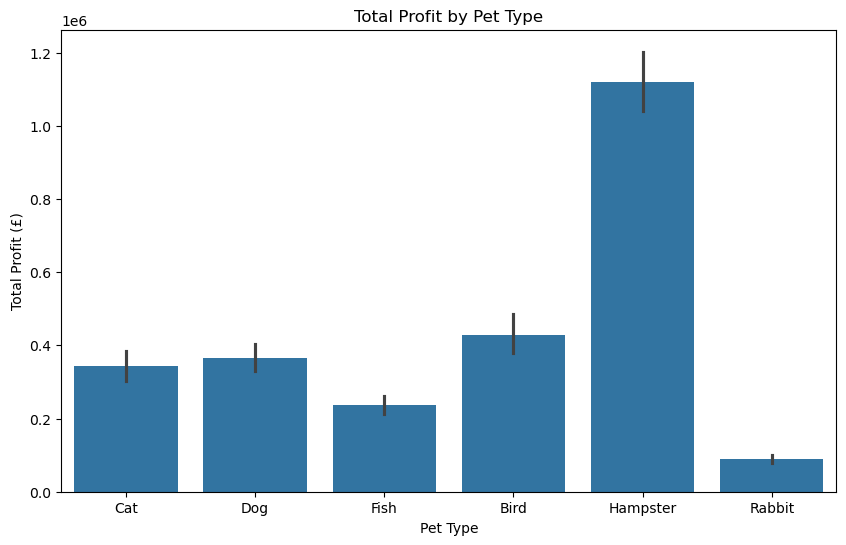

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pet' , y= 'Profit', data=df, estimator=sum, errorbar=('ci', 95))
plt.title('Total Profit by Pet Type')
plt.ylabel('Total Profit (£)')
plt.xlabel('Pet Type')
plt.show()

In [155]:
##profit by Area 

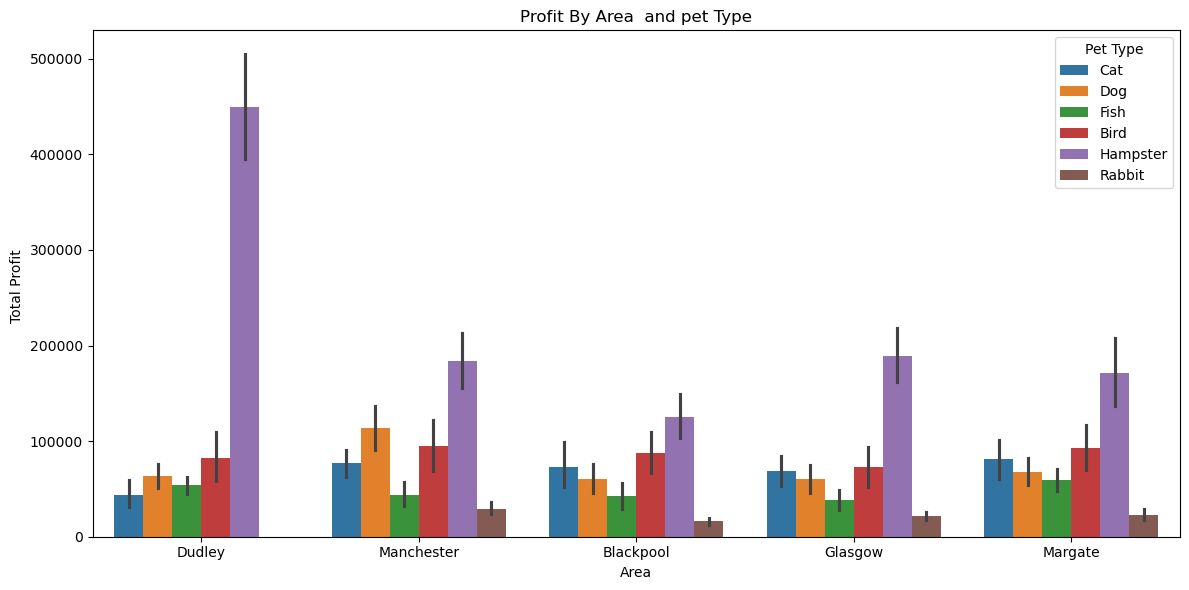

In [157]:
plt.figure(figsize = (12,6))
sns.barplot(x='Area', y='Profit', hue='Pet', data=df , estimator=sum , errorbar=('ci', 95))
# sns.barplot(x='Area', y='Profit', hue='Pet', data=df, estimator=sum, ci=None)
plt.title('Profit By Area  and pet Type')
plt.ylabel('Total Profit ')
plt.xlabel('Area')
plt.legend(title='Pet Type')
plt.tight_layout()
plt.show()

In [159]:
##Montly Profit 

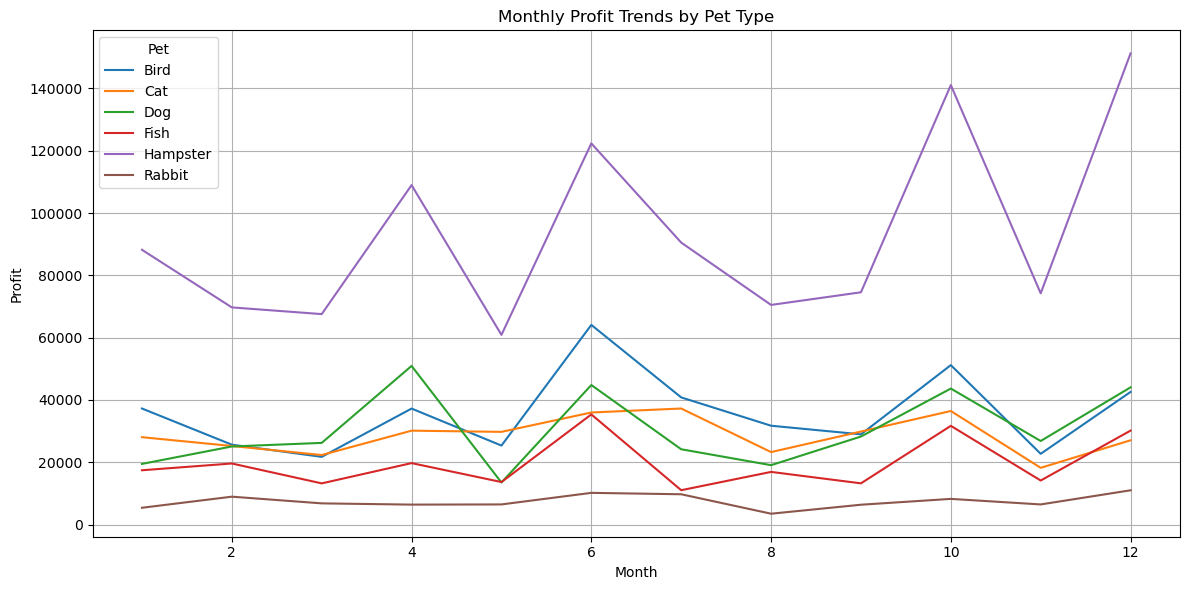

In [161]:
monthlyProfit = df.groupby(['Month','Pet'])['Profit'].sum().unstack()
monthlyProfit.plot(figsize=(12,6))
plt.title('Monthly Profit Trends by Pet Type')
plt.ylabel('Profit')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

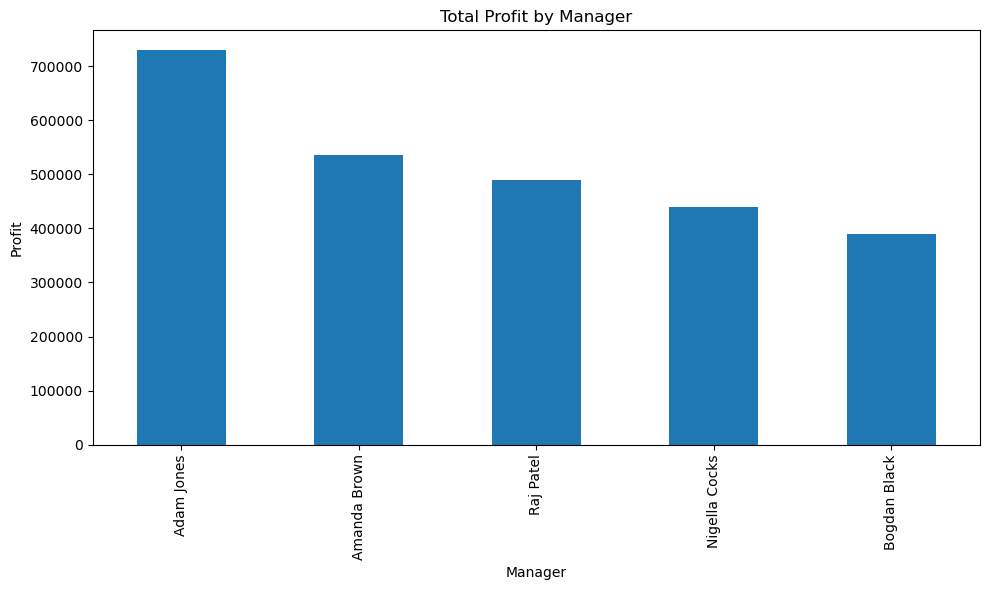

In [163]:
ManagerPerf = df.groupby('Manager')['Profit'].sum().sort_values(ascending=False)
ManagerPerf.plot(kind='bar', figsize=(10,6))
plt.title('Total Profit by Manager')
plt.ylabel('Profit')
plt.xlabel('Manager')
plt.tight_layout()
plt.show()

In [165]:
df.to_excel('D:/fury_friends_data.xlsx', index=False)